In [2]:
# importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# reading the CSV raw data thorugh pandas
df_hotels = pd.read_csv(r'C:\Users\naman\Downloads\DMDDA3\DMDDA3\Hotels\US_Hotels.csv')
df_hotels.head()

,name,location,beds,rating,rating_title,number_of_ratings,price,price_for,image,url
0,Stargazer Inn and Suites,"Munras Avenue, Monterey",1 large double bed,8.1 out of 10,Very good,"1,676 reviews",US$213,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/clarion-monte...
1,Pacific Inn Monterey,"North Fremont, Monterey",1 large double bed,8.5 out of 10,Very good,"1,033 reviews",US$242,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/best-western-...
2,Hotel Pacific,"Downtown Monterey, Monterey",1 extra-large double bed,7.5 out of 10,Good,"2,151 reviews",US$678,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/pacific.en-gb...
3,Stage Coach Lodge,"Downtown Monterey, Monterey",1 extra-large double bed,8.5 out of 10,Very good,"1,090 reviews",US$338,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/stage-coach-l...
4,El Castell Motel,"North Fremont, Monterey",1 large double bed,8.3 out of 10,Very good,"1,210 reviews",US$248,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/el-castell.en...


In [4]:
# raw data cleaning procedure
df_hotels['rating'] = df_hotels.apply(lambda row: row['rating'].split(' ')[0],axis=1)
df_hotels['price'] = df_hotels['price'].str.replace(r'\D', '')
df_hotels[['Duration', 'Number of Occupants']] = df_hotels.price_for.str.split(",", expand = True)
df_hotels['number_of_ratings'] = df_hotels['number_of_ratings'].str.replace('reviews','')
df_hotels['number_of_ratings'] = df_hotels['number_of_ratings'].str.replace('review','')
df_hotels['number_of_ratings'] = df_hotels['number_of_ratings'].str.replace(',','')
df_hotels['number_of_ratings'] =df_hotels['number_of_ratings'].fillna(0)
df_hotels['rating'] = df_hotels['rating'].str.strip().replace('','0')
df_hotels['rating_title'] = df_hotels['rating_title'].str.replace('Review score','Not Available')
df_hotels['location'] = df_hotels.apply(lambda row: row['location'].split(",")[-1],axis=1)
# displaying the cleaned data
df_hotels

<ipython-input-4-6a6a25d6edad>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_hotels['price'] = df_hotels['price'].str.replace(r'\D', '')


,name,location,beds,rating,rating_title,number_of_ratings,price,price_for,image,url,Duration,Number of Occupants
0,Stargazer Inn and Suites,Monterey,1 large double bed,8.1,Very good,1676,213,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/clarion-monte...,2 nights,2 adults
1,Pacific Inn Monterey,Monterey,1 large double bed,8.5,Very good,1033,242,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/best-western-...,2 nights,2 adults
2,Hotel Pacific,Monterey,1 extra-large double bed,7.5,Good,2151,678,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/pacific.en-gb...,2 nights,2 adults
3,Stage Coach Lodge,Monterey,1 extra-large double bed,8.5,Very good,1090,338,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/stage-coach-l...,2 nights,2 adults
4,El Castell Motel,Monterey,1 large double bed,8.3,Very good,1210,248,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/el-castell.en...,2 nights,2 adults
...,...,...,...,...,...,...,...,...,...,...,...,...
4970,Mt. Madison Inn & Suites,Gorham,1 king bed,8.2,Very Good,464,200,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/mt-madison-in...,2 nights,2 adults
4971,Wildcat Inn and Tavern,Jackson,1 queen bed,8.8,Excellent,135,306,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/wildcat-inn-a...,2 nights,2 adults
4972,Indian Head Resort,Lincoln,"2 beds (1 full, 1 king)",7.7,Good,225,469,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/indian-head-r...,2 nights,2 adults
4973,11 Island Drive,Madison,Entire chalet • 2 bedrooms • 1 living room • 1...,9,Wonderful,3,321,"2 nights , 2 adults",https://cf.bstatic.com/xdata/images/hotel/squa...,https://www.booking.com/hotel/us/11-island-dri...,2 nights,2 adults


In [5]:
# Check for missing values and column names
df_hotels.count()

name                   4975
location               4975
beds                   4923
rating                 4975
rating_title           4975
number_of_ratings      4975
price                  4975
price_for              4975
image                  4975
url                    4975
Duration               4975
Number of Occupants    4975
dtype: int64

In [6]:
# Rename column names
df_hotels.columns = ["name","city","beds","rating","rating_title","number_of_ratings","price","price_for","image","url","duration","number_of_occupants"] 

In [7]:
# Delete Column
del df_hotels['price_for']

In [8]:
# dictionary to take 
dict_dtype = {
    'name':str,
    'city':str,
    'beds':str,
    'rating':float,
    'rating_title':str,
    'number_of_ratings':int,
    'price':int,
    'image':str,
    'url':str,
    'duration':str,
    'number_of_occupants':str  
}

# iterating over the keys of dictionary to change the data type to required format 
for key in dict_dtype.keys():
    df_hotels[key] = df_hotels[key].astype(dict_dtype[key])

In [9]:
df_hotels.dtypes

name                    object
city                    object
beds                    object
rating                 float64
rating_title            object
number_of_ratings        int32
price                    int32
image                   object
url                     object
duration                object
number_of_occupants     object
dtype: object

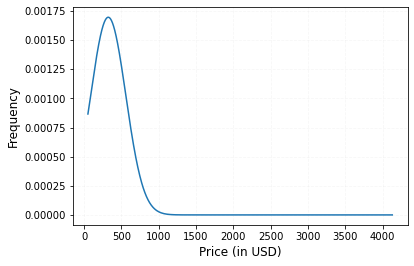

In [10]:
# mean price from dataframe
mu = np.mean(df_hotels["price"])
# standard deviation price from dataframe
sigma = np.std(df_hotels["price"])

# numpy random normalizing
s = np.random.normal(mu, sigma, 1000)

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_hotels["price"].sort_values(), mu, sigma)

# Drawing a graph
plt.plot(df_hotels["price"].sort_values(), pdf)
plt.xlabel("Price (in USD)", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.1, linestyle="--")
# show plots
plt.show()

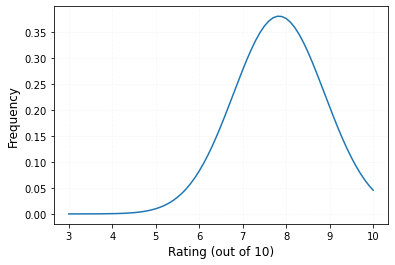

In [11]:
# mean rating from dataframe
mu = np.mean(df_hotels["rating"])
# standard deviation rating from dataframe
sigma = np.std(df_hotels["rating"])

# numpy random normalizing
s = np.random.normal(mu, sigma, 1000)

# Calculating probability density function (PDF)
pdf = stats.norm.pdf(df_hotels["rating"].sort_values(), mu, sigma)

# Drawing a graph
plt.plot(df_hotels["rating"].sort_values(), pdf)
plt.xlabel("Rating (out of 10)", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.1, linestyle="--")
# show plots
plt.show()

Text(0, 0.5, '# of Hotels')

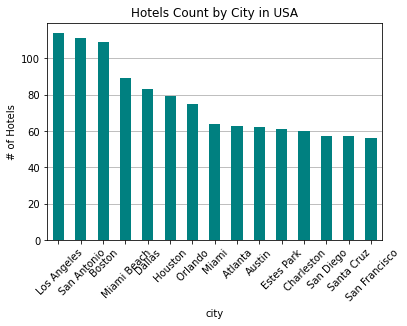

In [12]:
# Get hotel count for each city
city_group = df_hotels.groupby("city").count()
# Reset index
city_group = city_group.reset_index()
# Create new dataframe for city name and hotel count
city_group = city_group[["city", "name"]]
# Rename columns
city_group.rename(columns={"name": "Hotels Count"}, inplace=True)
hotels_by_city=city_group.sort_values(by=['Hotels Count'], ascending=False).iloc[:15,:]

# Create bar chart for hotel count by city
city_bar = hotels_by_city.plot.bar(x="city", y="Hotels Count", rot=90, legend=None, color="teal", zorder=3)
plt.grid(which="major", axis="y", zorder=0)
plt.xticks(rotation=45)
plt.title("Hotels Count by City in USA")
plt.ylabel("# of Hotels")

Text(0.5, 1.0, 'Hotels Count Percentage by City in USA')

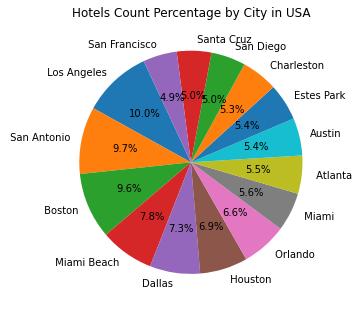

In [13]:
# Create pie chart for hotel count by city
hotels_count = hotels_by_city["Hotels Count"]
# colors = ["aqua", "lightblue", "gold", "olive", "turquoise"]
city_labels = hotels_by_city["city"]
plt.figure(figsize=(5,9))
plt.pie(hotels_count, labels=city_labels, startangle=115, autopct="%1.1f%%")
plt.title("Hotels Count Percentage by City in USA")

In [243]:
# Get hotel count for each city
city_group = df_hotels.groupby("city").count()
# Reset index
city_group = city_group.reset_index()
# Create new dataframe for city name and hotel count
city_group = city_group[["city", "name"]]
# Rename columns
city_group.rename(columns={"name": "Hotels Count"}, inplace=True)
hotels_by_city=city_group.sort_values(by=['Hotels Count'], ascending=False).iloc[:15,:]

# Check value count for each unique value for minimum price column
df_hotels.groupby(["price"]).count()["city"]

price
51      1
60      1
61      1
72      2
78      1
       ..
2352    1
2596    2
2598    1
3401    1
4130    1
Name: city, Length: 714, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


Text(0, 0.5, 'Minimum Hotel Cost (USD)')

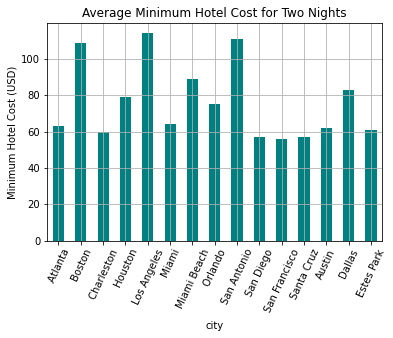

In [244]:
# Get hotel count for each city
city_group = df_hotels.groupby("city").count()
# Reset index
city_group = city_group.reset_index()
# Create new dataframe for city name and hotel count
city_group = city_group[["city", "price"]]
hotels_by_city=city_group.sort_values(by=['price'], ascending=False).iloc[:15,:]


# Obtain the mean and standard deviation (STD)
price_mean = hotels_by_city.groupby(["city"]).mean()["price"]
price_std = hotels_by_city.groupby(["city"]).std()["price"]
# Create new dataframe for mean values
mean_df = pd.DataFrame({"city":price_mean.index, "Price Mean (USD)":price_mean.values})
mean_df = mean_df.set_index("city")
# Create bar chart with y error bar 
mean_df.plot(kind="bar", yerr=price_std.values, color="teal", legend=None)
plt.xticks(rotation=65)
plt.grid()
plt.title("Average Minimum Hotel Cost for Two Nights")
plt.ylabel("Minimum Hotel Cost (USD)")

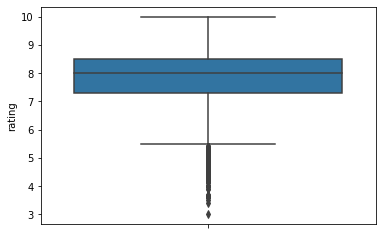

In [245]:
# box plot for rating field in data
sns.boxplot(y="rating", data=df_hotels);

In [240]:
# writing the final output as CSV
df_hotels.to_csv(r'C:\Users\Dell\Desktop\DMDD_Assignment3\US_Hotels_Updated.csv',index=False)